# PREDICTING FETAL HEALTH 
**Note: CTG features and pattern diagnostic feature**

## Contents
* [Data Acquisition and Exploration](#Data-Acquisition-and-Exploration)
* [Feature selection](#Feature-selection)
* [Classification Modelling](#Classification-Modelling)
* [Base classifiers](#Base-classifiers)
* [Ensembling method - Bagging](#Ensembling-method---Bagging)
* [Ensembling method - Boosting](#Ensembling-method---Boosting)
* [Undersampling techniques](#Undersampling-techniques)
* [Oversampling techniques](#Oversampling-techniques)


## Data Acquisition and Exploration
* [Import data](#Import-data)
* [Dataset exploration](#Dataset-exploration)

In [77]:
# Import Dependencies
%matplotlib inline

# Begin Python Imports
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### Import data

In [78]:
# Read data 
fetal_ori_label_encoded = pd.read_csv('ori_label_encoded_df.csv')
fetal_ori_one_hot = pd.read_csv('ori_one_hot_encoded_df.csv')
fetal_norm_label_encoded = pd.read_csv('norm_label_encoded_df.csv')
fetal_norm_one_hot = pd.read_csv('norm_one_hot_encoded_df.csv')

In [79]:
# Check first 2 instances and last 2 instances
fetal_ori_label_encoded.head(2).append(fetal_ori_label_encoded.tail(2))

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert,baseline_value_SisPorto,Accelerations_SisPorto,Foetal_Movement_SisPorto,uterine_contractions_SisPorto,time_with_abnormal_ST_variability_pct_SisPorto,ST_variability_mean_SisPorto,time_with_abnormal_LT_variability_pct_SisPorto,LT_variability_mean_SisPorto,light_decelerations,severe_decelerations,proloungued_decelerations,repetitive_decelerations,hist_width,hist_min,hist_max,hist_peaks_count,hist_zero_count,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code,target_label
0,Variab10.txt,01-12-96,CTG0001.txt,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,0,0,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,03-05-96,CTG0002.txt,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0,0,0,0,0,1,0,0,0,0,6,1
2124,S8001045.dsp,06-06-98,CTG2127.txt,1576,3049,140,140,1,0,9,78,0.4,27,7.0,0,0,0,0,66,103,169,6,0,152,147,151,4,1,0,0,0,0,1,0,0,0,0,0,5,2
2125,S8001045.dsp,06-06-98,CTG2128.txt,2796,3415,142,142,1,1,5,74,0.4,36,5.0,0,0,0,0,42,117,159,2,1,145,143,145,1,0,1,0,0,0,0,0,0,0,0,0,1,1


In [80]:
# Check first 2 instances and last 2 instances
fetal_ori_one_hot.head(2).append(fetal_ori_one_hot.tail(2))

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert,baseline_value_SisPorto,Accelerations_SisPorto,Foetal_Movement_SisPorto,uterine_contractions_SisPorto,time_with_abnormal_ST_variability_pct_SisPorto,ST_variability_mean_SisPorto,time_with_abnormal_LT_variability_pct_SisPorto,LT_variability_mean_SisPorto,light_decelerations,severe_decelerations,proloungued_decelerations,repetitive_decelerations,hist_width,hist_min,hist_max,hist_peaks_count,hist_zero_count,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency_-1,hist_tendency_0,hist_tendency_1,calm_sleep_0,calm_sleep_1,REM_sleep_0,REM_sleep_1,calm_vigilance_0,calm_vigilance_1,active_vigilance_0,active_vigilance_1,shift_pattern_0,shift_pattern_1,accelerative_decelerative_pattern_stress_situation_0,accelerative_decelerative_pattern_stress_situation_1,decelerative_pattern_vagal_stimulation_0,decelerative_pattern_vagal_stimulation_1,large_decelerative_pattern_0,large_decelerative_pattern_1,flat_sinusoidal_pattern_pathological_state_0,flat_sinusoidal_pattern_pathological_state_1,suspect_pattern_0,suspect_pattern_1,class_code_1,class_code_2,class_code_3,class_code_4,class_code_5,class_code_6,class_code_7,class_code_8,class_code_9,class_code_10,target_label
0,Variab10.txt,01-12-96,CTG0001.txt,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,2
1,Fmcs_1.txt,03-05-96,CTG0002.txt,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2124,S8001045.dsp,06-06-98,CTG2127.txt,1576,3049,140,140,1,0,9,78,0.4,27,7.0,0,0,0,0,66,103,169,6,0,152,147,151,4,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,2
2125,S8001045.dsp,06-06-98,CTG2128.txt,2796,3415,142,142,1,1,5,74,0.4,36,5.0,0,0,0,0,42,117,159,2,1,145,143,145,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [81]:
# Check first 2 instances and last 2 instances
fetal_norm_label_encoded.head(2).append(fetal_norm_label_encoded.tail(2))

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code,target_label
0,Variab10.txt,01-12-96,CTG0001.txt,240,357,0.259259,0.259259,0.000000,0.000000,0.000000,0.813333,0.044118,0.472527,0.047337,0.000,0.0,0.0,0.0,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1,0,0,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,03-05-96,CTG0002.txt,5,632,0.481481,0.481481,0.153846,0.000000,0.173913,0.066667,0.279412,0.000000,0.205128,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0,0,0,0,0,0,1,0,0,0,0,6,1
2124,S8001045.dsp,06-06-98,CTG2127.txt,1576,3049,0.629630,0.629630,0.038462,0.000000,0.391304,0.880000,0.029412,0.296703,0.138067,0.000,0.0,0.0,0.0,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,1,0,0,0,0,1,0,0,0,0,0,5,2
2125,S8001045.dsp,06-06-98,CTG2128.txt,2796,3415,0.666667,0.666667,0.038462,0.001773,0.217391,0.826667,0.029412,0.395604,0.098619,0.000,0.0,0.0,0.0,0.220339,0.614679,0.318966,0.111111,0.1,0.669291,0.642202,0.623853,0.003717,0,1,0,0,0,0,0,0,0,0,0,1,1


In [82]:
# Check first 2 instances and last 2 instances
fetal_norm_one_hot.head(2).append(fetal_norm_one_hot.tail(2))

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized,hist_tendency_-1,hist_tendency_0,hist_tendency_1,calm_sleep_0,calm_sleep_1,REM_sleep_0,REM_sleep_1,calm_vigilance_0,calm_vigilance_1,active_vigilance_0,active_vigilance_1,shift_pattern_0,shift_pattern_1,accelerative_decelerative_pattern_stress_situation_0,accelerative_decelerative_pattern_stress_situation_1,decelerative_pattern_vagal_stimulation_0,decelerative_pattern_vagal_stimulation_1,large_decelerative_pattern_0,large_decelerative_pattern_1,flat_sinusoidal_pattern_pathological_state_0,flat_sinusoidal_pattern_pathological_state_1,suspect_pattern_0,suspect_pattern_1,class_code_1,class_code_2,class_code_3,class_code_4,class_code_5,class_code_6,class_code_7,class_code_8,class_code_9,class_code_10,target_label
0,Variab10.txt,01-12-96,CTG0001.txt,240,357,0.259259,0.259259,0.000000,0.000000,0.000000,0.813333,0.044118,0.472527,0.047337,0.000,0.0,0.0,0.0,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,2
1,Fmcs_1.txt,03-05-96,CTG0002.txt,5,632,0.481481,0.481481,0.153846,0.000000,0.173913,0.066667,0.279412,0.000000,0.205128,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2124,S8001045.dsp,06-06-98,CTG2127.txt,1576,3049,0.629630,0.629630,0.038462,0.000000,0.391304,0.880000,0.029412,0.296703,0.138067,0.000,0.0,0.0,0.0,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,2
2125,S8001045.dsp,06-06-98,CTG2128.txt,2796,3415,0.666667,0.666667,0.038462,0.001773,0.217391,0.826667,0.029412,0.395604,0.098619,0.000,0.0,0.0,0.0,0.220339,0.614679,0.318966,0.111111,0.1,0.669291,0.642202,0.623853,0.003717,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


**[Back to Content](#Contents)**

### Dataset exploration

In [83]:
# Check column type
fetal_ori_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   FileName                                            2126 non-null   object 
 1   Date                                                2126 non-null   object 
 2   SegFile                                             2126 non-null   object 
 3   start_instant                                       2126 non-null   int64  
 4   end_instant                                         2126 non-null   int64  
 5   baseline_value_med_expert                           2126 non-null   int64  
 6   baseline_value_SisPorto                             2126 non-null   int64  
 7   Accelerations_SisPorto                              2126 non-null   int64  
 8   Foetal_Movement_SisPorto                            2126 non-null   int64  
 9

In [84]:
# Check column type
fetal_ori_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FileName                                              2126 non-null   object 
 1   Date                                                  2126 non-null   object 
 2   SegFile                                               2126 non-null   object 
 3   start_instant                                         2126 non-null   int64  
 4   end_instant                                           2126 non-null   int64  
 5   baseline_value_med_expert                             2126 non-null   int64  
 6   baseline_value_SisPorto                               2126 non-null   int64  
 7   Accelerations_SisPorto                                2126 non-null   int64  
 8   Foetal_Movement_SisPorto                              2126

In [85]:
# Check column type
fetal_norm_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   FileName                                                   2126 non-null   object 
 1   Date                                                       2126 non-null   object 
 2   SegFile                                                    2126 non-null   object 
 3   start_instant                                              2126 non-null   int64  
 4   end_instant                                                2126 non-null   int64  
 5   baseline_value_med_expert_normalized                       2126 non-null   float64
 6   baseline_value_SisPorto_normalized                         2126 non-null   float64
 7   Accelerations_SisPorto_normalized                          2126 non-null   float64
 8   Foetal_M

In [86]:
# Check column type
fetal_norm_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 61 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   FileName                                                   2126 non-null   object 
 1   Date                                                       2126 non-null   object 
 2   SegFile                                                    2126 non-null   object 
 3   start_instant                                              2126 non-null   int64  
 4   end_instant                                                2126 non-null   int64  
 5   baseline_value_med_expert_normalized                       2126 non-null   float64
 6   baseline_value_SisPorto_normalized                         2126 non-null   float64
 7   Accelerations_SisPorto_normalized                          2126 non-null   float64
 8   Foetal_M

**[Back to Content](#Contents)**

### Classification Modelling

### Feature selection
* [Drop redundant columns](#Drop-redundant-columns)
* [Drop constant columns](#Drop-constant-columns)
* [Remove multicollinearity effect](#Remove-multicollinearity-effect)

**[Back to Content](#Contents)**

#### Drop redundant columns

In [87]:
# Drop the redundant columns 
            
fetal_ori_label_encoded.drop(['FileName', 'Date','SegFile',
                             'class_code'], axis = 1, inplace = True)

fetal_ori_one_hot.drop(['FileName', 'Date','SegFile',
                             'class_code_1','class_code_2',
                             'class_code_3','class_code_4',
                             'class_code_5','class_code_6',
                             'class_code_7','class_code_8',
                             'class_code_9','class_code_10',
                             'hist_tendency_-1','calm_sleep_0',
                             'REM_sleep_0','calm_vigilance_0',
                             'active_vigilance_0','shift_pattern_0',
                             'accelerative_decelerative_pattern_stress_situation_0',
                             'decelerative_pattern_vagal_stimulation_0',
                             'large_decelerative_pattern_0',
                             'flat_sinusoidal_pattern_pathological_state_0',
                             'suspect_pattern_0' ], axis = 1, inplace = True)

fetal_norm_label_encoded.drop(['FileName', 'Date','SegFile',
                             'class_code'], axis = 1, inplace = True)

fetal_norm_one_hot.drop(['FileName', 'Date','SegFile',
                             'class_code_1','class_code_2',
                             'class_code_3','class_code_4',
                             'class_code_5','class_code_6',
                             'class_code_7','class_code_8',
                             'class_code_9','class_code_10',
                             'hist_tendency_-1','calm_sleep_0',
                             'REM_sleep_0','calm_vigilance_0',
                             'active_vigilance_0','shift_pattern_0',
                             'accelerative_decelerative_pattern_stress_situation_0',
                             'decelerative_pattern_vagal_stimulation_0',
                             'large_decelerative_pattern_0',
                             'flat_sinusoidal_pattern_pathological_state_0',
                             'suspect_pattern_0' ], axis = 1, inplace = True)

**[Back to Feature selection](#Feature-selection)**

#### Drop constant columns

In [88]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [89]:
# separate train and test (again, as we transformed the previous ones)
# fetal_ori_label_encoded
X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label = train_test_split(
                                                                                fetal_ori_label_encoded.drop(labels=['target_label'], axis=1),
                                                                                fetal_ori_label_encoded['target_label'],
                                                                                test_size=0.3,
                                                                                random_state=123)

# fetal_ori_label_encoded
X_train_ori_one, X_test_ori_one, y_train_ori_one, y_test_ori_one = train_test_split(
                                                                        fetal_ori_one_hot.drop(labels=['target_label'], axis=1),
                                                                        fetal_ori_one_hot['target_label'],
                                                                        test_size=0.3,
                                                                        random_state=123)

# fetal_norm_label_encoded
X_train_norm_label, X_test_norm_label, y_train_norm_label, y_test_norm_label = train_test_split(
                                                                                    fetal_norm_label_encoded.drop(labels=['target_label'], axis=1),
                                                                                    fetal_norm_label_encoded['target_label'],
                                                                                    test_size=0.3,
                                                                                    random_state=123)

# fetal_norm_one_hot
X_train_norm_one, X_test_norm_one, y_train_norm_one, y_test_norm_one = train_test_split(
                                                                            fetal_norm_one_hot.drop(labels=['target_label'], axis=1),
                                                                            fetal_norm_one_hot['target_label'],
                                                                            test_size=0.3,
                                                                            random_state=123)

In [90]:
print("Dataset 'fetal_ori_label_encoded': ",X_train_ori_label.shape, X_test_ori_label.shape)
print("Dataset 'fetal_ori_one_hot': ",X_train_ori_one.shape, X_test_ori_one.shape)
print("Dataset 'fetal_norm_label_encoded': ",X_train_norm_label.shape, X_test_norm_label.shape)
print("Dataset 'fetal_norm_one_hot': ",X_train_norm_one.shape, X_test_norm_one.shape)

Dataset 'fetal_ori_label_encoded':  (1488, 35) (638, 35)
Dataset 'fetal_ori_one_hot':  (1488, 36) (638, 36)
Dataset 'fetal_norm_label_encoded':  (1488, 35) (638, 35)
Dataset 'fetal_norm_one_hot':  (1488, 36) (638, 36)


In [91]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train_ori_label)
X_train_ori_label = sel.transform(X_train_ori_label)
X_test_ori_label = sel.transform(X_test_ori_label)
print("Feature to drop in 'fetal_ori_label_encoded':",sel.features_to_drop_)

Feature to drop in 'fetal_ori_label_encoded': ['repetitive_decelerations']


In [92]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train_ori_one)
X_train_ori_one = sel.transform(X_train_ori_one)
X_test_ori_one = sel.transform(X_test_ori_one)
print("Feature to drop in 'fetal_ori_one_hot':",sel.features_to_drop_)

Feature to drop in 'fetal_ori_one_hot': ['repetitive_decelerations']


In [93]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train_norm_label)
X_train_norm_label = sel.transform(X_train_norm_label)
X_test_norm_label = sel.transform(X_test_norm_label)
print("Feature to drop in 'fetal_norm_label_encoded':",sel.features_to_drop_)

Feature to drop in 'fetal_norm_label_encoded': ['repetitive_decelerations_normalized']


In [94]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train_norm_one)
X_train_norm_one = sel.transform(X_train_norm_one)
X_test_norm_one = sel.transform(X_test_norm_one)
print("Feature to drop in 'fetal_norm_one_hot':",sel.features_to_drop_)

Feature to drop in 'fetal_norm_one_hot': ['repetitive_decelerations_normalized']


`repetitive_decelerations` is a constant features with only one kind of response for all instances. This does not give any information to the model, hence we will drop it.

In [95]:
# Drop the redundant columns 

fetal_ori_label_encoded.drop(['repetitive_decelerations'], axis = 1, inplace = True)

fetal_ori_one_hot.drop(['repetitive_decelerations'], axis = 1, inplace = True)

fetal_norm_label_encoded.drop(['repetitive_decelerations_normalized'], axis = 1, inplace = True)

fetal_norm_one_hot.drop(['repetitive_decelerations_normalized'], axis = 1, inplace = True)

**[Back to Feature selection](#Feature-selection)**

#### Remove multicollinearity effect
##### a) Positive effect

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

def check_positive_multicollinearity(X_train,y_train):
    corrmat = X_train.corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= 0.90]
    corrmat = corrmat[corrmat < 1]
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']

    grouped_feature_ls = []
    correlated_groups = []

    for feature in corrmat.feature1.unique():

        if feature not in grouped_feature_ls:

            # find all features correlated to a single feature
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]

            # append the block of features to the list
            correlated_groups.append(correlated_block)
   
    print('found {} correlated groups'.format(len(correlated_groups)))
    print('out of {} total features'.format(X_train.shape[1]))
    print()
    
    for group in correlated_groups:
        print("Group:")
        print(group)
        print()

        # add all features of the group to a list
        features = list(group['feature2'].unique())+list(group['feature1'].unique())

        # train a random forest 
        rf = RandomForestClassifier(n_estimators=100, random_state=123, max_depth=4)
        rf.fit(X_train[features].fillna(0), y_train)
        
        # get the feature importance attributed by the 
        # random forest model (more on this in coming lectures)

        importance = pd.concat(
            [pd.Series(features),
             pd.Series(rf.feature_importances_)], axis=1)

        importance.columns = ['feature', 'importance']

        # sort features by importance, most important first
        print("Feature Importance:")
        print(importance.sort_values(by='importance', ascending=False))
        print()

In [98]:
# fetal_ori_label_encoded
check_positive_multicollinearity(X_train_ori_label,y_train_ori_label)

found 2 correlated groups
out of 34 total features

Group:
        feature1     feature2      corr
0  start_instant  end_instant  0.947065

Feature Importance:
         feature  importance
0    end_instant    0.529704
1  start_instant    0.470296

Group:
      feature1   feature2      corr
2  hist_median  hist_mean  0.944434
5  hist_median  hist_mode  0.934076

Feature Importance:
       feature  importance
0    hist_mean    0.374751
1    hist_mode    0.343479
2  hist_median    0.281770



In [99]:
# fetal_ori_one_hot
check_positive_multicollinearity(X_train_ori_one,y_train_ori_one)

found 3 correlated groups
out of 35 total features

Group:
      feature1       feature2      corr
0  end_instant  start_instant  0.947065

Feature Importance:
         feature  importance
1    end_instant    0.523264
0  start_instant    0.476736

Group:
    feature1     feature2      corr
2  hist_mean  hist_median  0.944434

Feature Importance:
       feature  importance
1    hist_mean    0.578057
0  hist_median    0.421943

Group:
    feature1     feature2      corr
4  hist_mode  hist_median  0.934076

Feature Importance:
       feature  importance
1    hist_mode    0.523391
0  hist_median    0.476609



In [100]:
# fetal_norm_label_encoded
check_positive_multicollinearity(X_train_norm_label,y_train_norm_label)

found 2 correlated groups
out of 34 total features

Group:
        feature1     feature2      corr
0  start_instant  end_instant  0.947065

Feature Importance:
         feature  importance
0    end_instant    0.529704
1  start_instant    0.470296

Group:
                 feature1              feature2      corr
2  hist_median_normalized  hist_mean_normalized  0.944434
5  hist_median_normalized  hist_mode_normalized  0.934076

Feature Importance:
                  feature  importance
0    hist_mean_normalized    0.374751
1    hist_mode_normalized    0.343479
2  hist_median_normalized    0.281770



In [101]:
# fetal_norm_label_encoded
check_positive_multicollinearity(X_train_norm_one,y_train_norm_one)

found 3 correlated groups
out of 35 total features

Group:
      feature1       feature2      corr
0  end_instant  start_instant  0.947065

Feature Importance:
         feature  importance
1    end_instant    0.523264
0  start_instant    0.476736

Group:
               feature1                feature2      corr
2  hist_mean_normalized  hist_median_normalized  0.944434

Feature Importance:
                  feature  importance
1    hist_mean_normalized    0.578057
0  hist_median_normalized    0.421943

Group:
               feature1                feature2      corr
4  hist_mode_normalized  hist_median_normalized  0.934076

Feature Importance:
                  feature  importance
1    hist_mode_normalized    0.523391
0  hist_median_normalized    0.476609



In this group, several features are highly correlated. Which one should we keep and which ones should we remove? Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [102]:
# Drop the redundant columns 

fetal_ori_label_encoded.drop(['start_instant','end_instant','hist_median','hist_mode'], axis = 1, inplace = True)

fetal_ori_one_hot.drop(['start_instant','end_instant','hist_median','hist_mode'], axis = 1, inplace = True)

fetal_norm_label_encoded.drop(['start_instant','end_instant','hist_median_normalized','hist_mode_normalized'], axis = 1, inplace = True)

fetal_norm_one_hot.drop(['start_instant','end_instant','hist_median_normalized','hist_mode_normalized'], axis = 1, inplace = True)

**[Back to Feature selection](#Feature-selection)**

##### b) Negative effect

In [103]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

def check_negative_multicollinearity(X_train):
    corrmat = X_train.corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat <= -0.9]
    corrmat = corrmat[corrmat > -1]
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']

    grouped_feature_ls = []
    correlated_groups = []

    for feature in corrmat.feature1.unique():

        if feature not in grouped_feature_ls:

            # find all features correlated to a single feature
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]

            # append the block of features to the list
            correlated_groups.append(correlated_block)

    print('found {} correlated groups'.format(len(correlated_groups)))
    print('out of {} total features'.format(X_train.shape[1]))
    print()
    
    for group in correlated_groups:
        print(group)
        print()

In [104]:
# fetal_ori_label_encoded
check_negative_multicollinearity(X_train_ori_label)

found 0 correlated groups
out of 34 total features



In [105]:
# fetal_ori_one_hot
check_negative_multicollinearity(X_train_ori_one)

found 0 correlated groups
out of 35 total features



In [106]:
# fetal_norm_label_encoded
check_negative_multicollinearity(X_train_norm_label)

found 0 correlated groups
out of 34 total features



In [107]:
# fetal_norm_label_encoded
check_negative_multicollinearity(X_train_norm_one)

found 0 correlated groups
out of 35 total features



**[Back to Feature selection](#Feature-selection)**

### Classification Modelling

In [108]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    plot_confusion_matrix,
    plot_precision_recall_curve
)

### Base classifiers
* [Decision Tree](#Decision-Tree)
* [Random Forest](#Random-Forest)

**[Back to Content](#Contents)**

In [109]:
# separate train and test (again, as we transformed the previous ones)
# fetal_ori_label_encoded
X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label = train_test_split(
                                                                                fetal_ori_label_encoded.drop(labels=['target_label'], axis=1),
                                                                                fetal_ori_label_encoded['target_label'],
                                                                                test_size=0.3,
                                                                                random_state=123)

# fetal_ori_label_encoded
X_train_ori_one, X_test_ori_one, y_train_ori_one, y_test_ori_one = train_test_split(
                                                                        fetal_ori_one_hot.drop(labels=['target_label'], axis=1),
                                                                        fetal_ori_one_hot['target_label'],
                                                                        test_size=0.3,
                                                                        random_state=123)

# fetal_norm_label_encoded
X_train_norm_label, X_test_norm_label, y_train_norm_label, y_test_norm_label = train_test_split(
                                                                                    fetal_norm_label_encoded.drop(labels=['target_label'], axis=1),
                                                                                    fetal_norm_label_encoded['target_label'],
                                                                                    test_size=0.3,
                                                                                    random_state=123)

# fetal_norm_one_hot
X_train_norm_one, X_test_norm_one, y_train_norm_one, y_test_norm_one = train_test_split(
                                                                            fetal_norm_one_hot.drop(labels=['target_label'], axis=1),
                                                                            fetal_norm_one_hot['target_label'],
                                                                            test_size=0.3,
                                                                            random_state=123)

In [110]:
print("Dataset 'fetal_ori_label_encoded': ",X_train_ori_label.shape, X_test_ori_label.shape)
print("Dataset 'fetal_ori_one_hot': ",X_train_ori_one.shape, X_test_ori_one.shape)
print("Dataset 'fetal_norm_label_encoded': ",X_train_norm_label.shape, X_test_norm_label.shape)
print("Dataset 'fetal_norm_one_hot': ",X_train_norm_one.shape, X_test_norm_one.shape)

Dataset 'fetal_ori_label_encoded':  (1488, 30) (638, 30)
Dataset 'fetal_ori_one_hot':  (1488, 31) (638, 31)
Dataset 'fetal_norm_label_encoded':  (1488, 30) (638, 30)
Dataset 'fetal_norm_one_hot':  (1488, 31) (638, 31)


#### Decision Tree

from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(max_depth = 3,random_state=123)
decision_tree.fit(X_train,y_train)

dot_data = tree.export_graphviz(decision_tree, out_file=None,feature_names= X_train.columns, filled = True)

In [ ]:
from IPython.display import Image

In [ ]:
import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

graph

##### 1. Grid Search - Decision Tree

In [112]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [113]:
params_grid = {"max_depth" : [2,3,4,5],
              "min_samples_split": [5,10,15,20,30,50],
              "min_samples_leaf": [2,3,4,5,8,10]
              }

In [114]:
def grid_search_decision_tree(X_train,X_test,y_train,y_test):
    decision_tree_null = tree.DecisionTreeClassifier(random_state=123,criterion="entropy")
    grid_search = GridSearchCV(decision_tree_null, params_grid,
                               n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)
    print("Best parameters:")
    print(grid_search.best_params_)

In [115]:
grid_search_decision_tree(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label)

Best parameters:
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [116]:
grid_search_decision_tree(X_train_ori_one, X_test_ori_one, y_train_ori_one, y_test_ori_one)

Best parameters:
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [117]:
grid_search_decision_tree(X_train_norm_label, X_test_norm_label, y_train_norm_label, y_test_norm_label)

Best parameters:
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [118]:
grid_search_decision_tree(X_train_norm_one, X_test_norm_one, y_train_norm_one, y_test_norm_one)

Best parameters:
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}


**[Back to Base classifiers](#Base-classifiers)**

##### 2. Importance by Decision Tree

In [119]:

# Sorting in descending order and rearranging feature names to match sorted feature importance

def DT_importance(X_train,y_train):
    dt = RandomForestClassifier(random_state=123, max_depth=4, min_samples_leaf=2,min_samples_split=5,criterion="entropy")
    dt.fit(X_train, y_train)
    
    importance = dt.feature_importances_
    indices = np.argsort(importance)[::-1] 
    names = [X_train.columns[i] for i in indices]

    # Bar chart creation
    sns.set_context("notebook")
    plt.figure(figsize=(20, 5))
    plt.title("Feature Importance")
    plt.bar(range(X_train.shape[1]), importance[indices])
    plt.xticks(range(X_train.shape[1]), names, rotation = 90)

    plt.show()

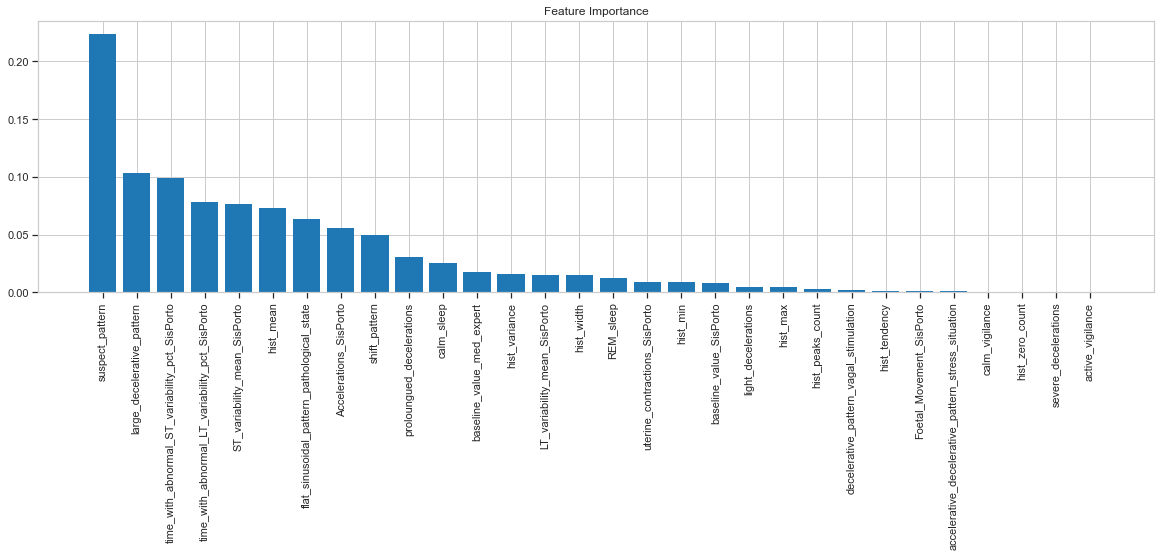

In [120]:
DT_importance(X_train_ori_label,y_train_ori_label)

**[Back to Base classifiers](#Base-classifiers)**

##### 3. Performance Evaluation of Decision Tree

In [151]:
##### 3. Performance Evaluation of Decision Treedef run_decision_tree(X_train, X_test, y_train, y_test, t_max_depth=4, t_min_samples_leaf=2, t_min_samples_split= 5):
    decision_tree = tree.DecisionTreeClassifier(max_depth=t_max_depth, min_samples_leaf=t_min_samples_leaf, 
                                                min_samples_split= t_min_samples_split,random_state=123,criterion="entropy")
    decision_tree.fit(X_train,y_train)
    
    print('Test set: Decision Tree')
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, decision_tree.predict_proba(X_test),multi_class='ovr')))
    #print()
    print('Accuracy Decision Tree test:', accuracy_score(y_test, decision_tree.predict(X_test)))
    print()
    print('Precision Decision Tree test:', precision_score(y_test, decision_tree.predict(X_test),average="weighted"))
    print()
    print('Recall Decision Tree test:', recall_score(y_test, decision_tree.predict(X_test),average="weighted"))
    print()
    print('F-measure Decision Tree test:', f1_score(y_test, decision_tree.predict(X_test),average="weighted"))
    print()
    print('Summary Report:')
    print(classification_report(y_test, decision_tree.predict(X_test)))
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, decision_tree.predict(X_test)))
    
#     fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
    
#     tree.plot_tree(decision_tree,
#                feature_names = X_train.columns, 
#                class_names=['Normal','Suspicious','Pathologic'],filled = True)
    
#     fig.savefig('DT.png')
    
    return f1_score(y_test, decision_tree.predict(X_test),average="weighted")

Test set: Decision Tree
Roc-auc Decision Tree roc-auc: 0.9776374268655328
Accuracy Decision Tree test: 0.987460815047022

Precision Decision Tree test: 0.9873666460183081

Recall Decision Tree test: 0.987460815047022

F-measure Decision Tree test: 0.9873267446277217

Summary Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       497
           2       0.97      0.93      0.95        84
           3       0.98      0.98      0.98        57

    accuracy                           0.99       638
   macro avg       0.98      0.97      0.98       638
weighted avg       0.99      0.99      0.99       638


Confusion Matrix
[[496   1   0]
 [  5  78   1]
 [  0   1  56]]


0.9873267446277217

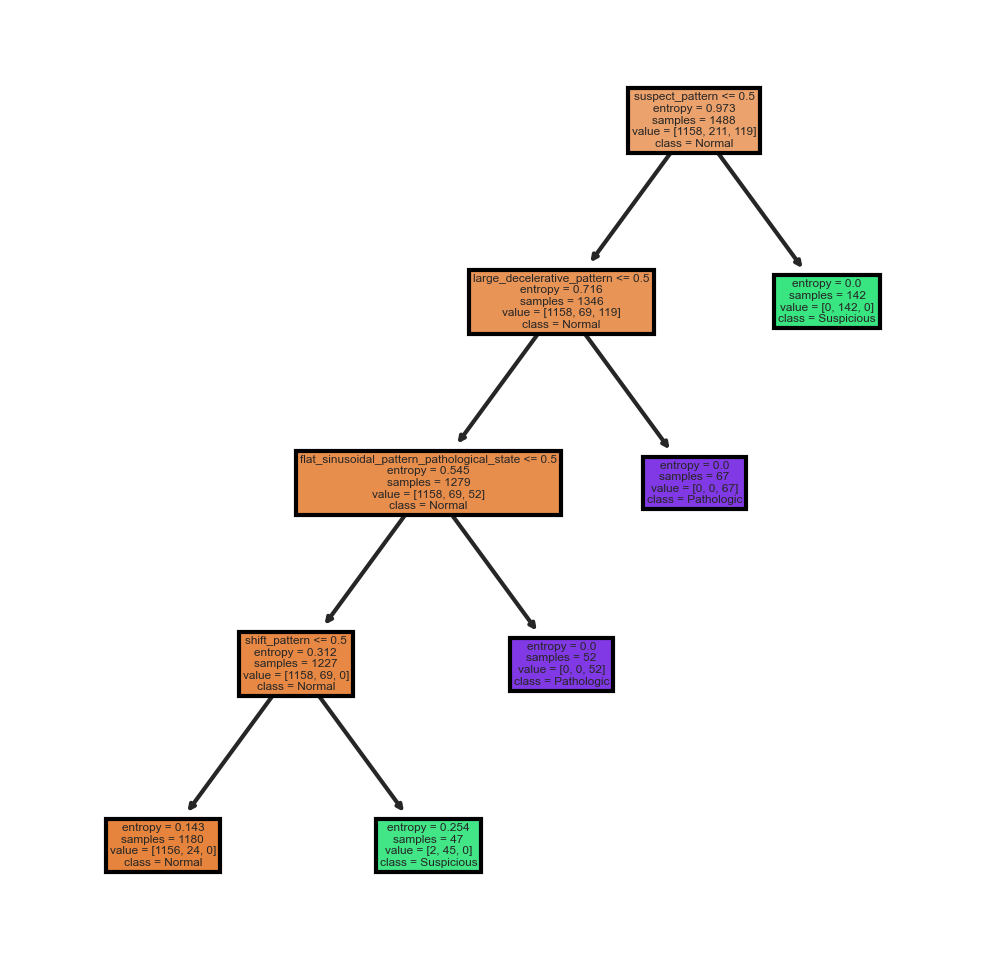

In [122]:
run_decision_tree(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label, 
                  t_max_depth=4, t_min_samples_leaf=2, t_min_samples_split= 5)

In [123]:
#run_decision_tree(X_train_ori_one, X_test_ori_one, y_train_ori_one, y_test_ori_one, 
#                  t_max_depth=4, t_min_samples_leaf=3, t_min_samples_split= 5)

In [124]:
# run_decision_tree(X_train_norm_label, X_test_norm_label, y_train_norm_label, y_test_norm_label, 
#                   t_max_depth=4, t_min_samples_leaf=3, t_min_samples_split= 5)

In [125]:
# run_decision_tree(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label, 
#                   t_max_depth=4, t_min_samples_leaf=3, t_min_samples_split= 5)

**[Back to Base classifiers](#Base-classifiers)**

#### Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

##### 1. Grid Search - Random Forest

In [127]:
##### 1. Grid Search - Random Forestparams_grid = {"n_estimators" : [50,100],
              "max_depth" : [2,3,4,5],
              "min_samples_split": [5,10,20,30,50],
              "min_samples_leaf": [2,3,4,5,8,10]
              }

In [128]:
def grid_search_rf(X_train,X_test,y_train,y_test):
    rf_null = RandomForestClassifier(random_state=123,criterion="entropy")
    grid_search = GridSearchCV(rf_null, params_grid,
                               n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:")
    print(grid_search.best_params_)

In [129]:
grid_search_rf(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label)

Best Parameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [130]:
grid_search_rf(X_train_ori_one, X_test_ori_one, y_train_ori_one, y_test_ori_one)

Best Parameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [131]:
grid_search_rf(X_train_norm_label, X_test_norm_label, y_train_norm_label, y_test_norm_label)

Best Parameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [132]:
grid_search_rf(X_train_norm_one, X_test_norm_one, y_train_norm_one, y_test_norm_one)

Best Parameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


**[Back to Base classifiers](#Base-classifiers)**

##### 2. Performance Evaluation of Random Forest

In [133]:
def run_randomForests(X_train, X_test, y_train, y_test,t_n_estimators=50,t_max_depth=5,
                      t_min_samples_split=5,t_min_samples_leaf=2):
    
    rf = RandomForestClassifier(n_estimators=t_n_estimators,max_depth=t_max_depth,min_samples_split=t_min_samples_split,
                                min_samples_leaf=t_min_samples_leaf,random_state=123,criterion="entropy")
    rf.fit(X_train, y_train)
    
    print('Test set: Random Forest')
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, rf.predict_proba(X_test),multi_class='ovr')))
    #print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),average="weighted"))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),average="weighted"))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),average="weighted"))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, rf.predict(X_test)))
    
    return f1_score(y_test, rf.predict(X_test),average="weighted")

In [134]:
run_randomForests(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label,
                  t_n_estimators=50,t_max_depth=5,t_min_samples_split=5,t_min_samples_leaf=2)

Test set: Random Forest
Roc-auc Random Forests roc-auc: 0.9948788006527128
Accuracy Random Forest test: 0.9764890282131662

Precision Random Forest test: 0.9764239383333406

Recall Random Forest test: 0.9764890282131662

F-measure Random Forest test: 0.9757769068520387

Summary Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       497
           2       0.97      0.85      0.90        84
           3       0.98      0.98      0.98        57

    accuracy                           0.98       638
   macro avg       0.98      0.94      0.96       638
weighted avg       0.98      0.98      0.98       638


Confusion Matrix
[[496   1   0]
 [ 12  71   1]
 [  0   1  56]]


0.9757769068520387

In [59]:
# run_randomForests(X_train_ori_one, X_test_ori_one, y_train_ori_one, y_test_ori_one,
#                   t_n_estimators=100,t_max_depth=5,t_min_samples_split=5,t_min_samples_leaf=2)

In [60]:
# run_randomForests(X_train_norm_label, X_test_norm_label, y_train_norm_label, y_test_norm_label,
#                  t_n_estimators=100,t_max_depth=5,t_min_samples_split=5,t_min_samples_leaf=2)

In [61]:
# run_randomForests(X_train_norm_one, X_test_norm_one, y_train_norm_one, y_test_norm_one,
#                  t_n_estimators=100,t_max_depth=5,t_min_samples_split=5,t_min_samples_leaf=2)

**[Back to Base classifiers](#Base-classifiers)**

#### Ensembling method - Bagging
* [Bagging - Decision Tree](#Bagging---Decision-Tree)
* [Bagging - Random Forest](#Bagging---Random-Forest)

**[Back to Content](#Contents)**

#### Ensembling method - Bagging
- Decision Tree
- Random Forest

In [135]:
dt_best = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,random_state=123,criterion="entropy")
dt_best.fit(X_train_ori_label, y_train_ori_label)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=5, random_state=123)

In [136]:
rf_best = RandomForestClassifier(n_estimators=50,max_depth=5, min_samples_split=5, min_samples_leaf=2,random_state=123,criterion="entropy")
rf_best.fit(X_train_ori_label, y_train_ori_label)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=123)

In [137]:
from sklearn.ensemble import BaggingClassifier

##### Bagging - Decision Tree

In [138]:
bag_clf_dt = BaggingClassifier(base_estimator=dt_best, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=123)

bag_clf_dt.fit(X_train_ori_label, y_train_ori_label)

print('Test set: Bagging (Decision Tree)')
print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test_ori_label, bag_clf_dt.predict_proba(X_test_ori_label),multi_class='ovr')))
print()
print('Accuracy Random Forest test:', accuracy_score(y_test_ori_label, bag_clf_dt.predict(X_test_ori_label)))
print()
print('Precision Random Forest test:', precision_score(y_test_ori_label, bag_clf_dt.predict(X_test_ori_label),average="weighted"))
print()
print('Recall Random Forest test:', recall_score(y_test_ori_label, bag_clf_dt.predict(X_test_ori_label),average="weighted"))
print()
print('F-measure Random Forest test:', f1_score(y_test_ori_label, bag_clf_dt.predict(X_test_ori_label),average="weighted"))
print()
print('Summary Report:')
print(classification_report(y_test_ori_label, bag_clf_dt.predict(X_test_ori_label)))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test_ori_label, bag_clf_dt.predict(X_test_ori_label)))

Test set: Bagging (Decision Tree)
Roc-auc Random Forests roc-auc: 0.9773350321180914

Accuracy Random Forest test: 0.987460815047022

Precision Random Forest test: 0.9873666460183081

Recall Random Forest test: 0.987460815047022

F-measure Random Forest test: 0.9873267446277217

Summary Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       497
           2       0.97      0.93      0.95        84
           3       0.98      0.98      0.98        57

    accuracy                           0.99       638
   macro avg       0.98      0.97      0.98       638
weighted avg       0.99      0.99      0.99       638


Confusion Matrix
[[496   1   0]
 [  5  78   1]
 [  0   1  56]]


**[Back to Ensembling method - Bagging](#Ensembling-method---Bagging)**

##### Bagging - Random Forest

In [139]:
bag_clf_rf = BaggingClassifier(base_estimator=rf_best, n_estimators=1000,
                               bootstrap=True, n_jobs=-1,
                               random_state=123)
bag_clf_rf.fit(X_train_ori_label, y_train_ori_label)

print('Test set: Bagging (Random Forest)')
print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test_ori_label, bag_clf_rf.predict_proba(X_test_ori_label),multi_class='ovr')))
print()
print('Accuracy Random Forest test:', accuracy_score(y_test_ori_label, bag_clf_rf.predict(X_test_ori_label)))
print()
print('Precision Random Forest test:', precision_score(y_test_ori_label, bag_clf_rf.predict(X_test_ori_label),average="weighted"))
print()
print('Recall Random Forest test:', recall_score(y_test_ori_label, bag_clf_rf.predict(X_test_ori_label),average="weighted"))
print()
print('F-measure Random Forest test:', f1_score(y_test_ori_label, bag_clf_rf.predict(X_test_ori_label),average="weighted"))
print()
print('Summary Report:')
print(classification_report(y_test_ori_label, bag_clf_rf.predict(X_test_ori_label)))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test_ori_label, bag_clf_rf.predict(X_test_ori_label)))

Test set: Bagging (Random Forest)
Roc-auc Random Forests roc-auc: 0.9947221342916651

Accuracy Random Forest test: 0.9733542319749217

Precision Random Forest test: 0.9733631226785385

Recall Random Forest test: 0.9733542319749217

F-measure Random Forest test: 0.9725206321200974

Summary Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       497
           2       0.97      0.83      0.90        84
           3       0.98      0.96      0.97        57

    accuracy                           0.97       638
   macro avg       0.98      0.93      0.95       638
weighted avg       0.97      0.97      0.97       638


Confusion Matrix
[[496   1   0]
 [ 13  70   1]
 [  1   1  55]]


**[Back to Ensembling method - Bagging](#Ensembling-method---Bagging)**

#### Ensembling method - Boosting
* [AdaBoost - Decision Tree](#AdaBoost---Decision-Tree)
* [AdaBoost - Random Forest](#AdaBoost---Random-Forest)
* [XGBoost](#XGBoost)

**[Back to Content](#Contents)**

##### AdaBoost - Decision Tree

In [140]:
from sklearn.ensemble import AdaBoostClassifier

In [141]:
ada_clf_dt = AdaBoostClassifier(base_estimator=dt_best, learning_rate =0.02, n_estimators =100)
ada_clf_dt.fit(X_train_ori_label, y_train_ori_label)

print('Test set: AdaBoost with Decision Tree')
print('Roc-auc AdaBoost with Decision Tree roc-auc: {}'.format(roc_auc_score(y_test_ori_label, ada_clf_dt.predict_proba(X_test_ori_label),multi_class='ovr')))
print()
print('Accuracy AdaBoost with Decision Tree test:', accuracy_score(y_test_ori_label, ada_clf_dt.predict(X_test_ori_label)))
print()
print('Precision AdaBoost with Decision Tree test:', precision_score(y_test_ori_label, ada_clf_dt.predict(X_test_ori_label),average="weighted"))
print()
print('Recall AdaBoost with Decision Tree test:', recall_score(y_test_ori_label, ada_clf_dt.predict(X_test_ori_label),average="weighted"))
print()
print('F-measure AdaBoost with Decision Tree test:', f1_score(y_test_ori_label, ada_clf_dt.predict(X_test_ori_label),average="weighted"))
print()
print('Summary Report:')
print(classification_report(y_test_ori_label, ada_clf_dt.predict(X_test_ori_label)))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test_ori_label, ada_clf_dt.predict(X_test_ori_label)))

Test set: AdaBoost with Decision Tree
Roc-auc AdaBoost with Decision Tree roc-auc: 0.9792608912874338

Accuracy AdaBoost with Decision Tree test: 0.9858934169278997

Precision AdaBoost with Decision Tree test: 0.9858023570741664

Recall AdaBoost with Decision Tree test: 0.9858934169278997

F-measure AdaBoost with Decision Tree test: 0.9857471507925151

Summary Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       497
           2       0.97      0.93      0.95        84
           3       0.98      0.96      0.97        57

    accuracy                           0.99       638
   macro avg       0.98      0.96      0.97       638
weighted avg       0.99      0.99      0.99       638


Confusion Matrix
[[496   1   0]
 [  5  78   1]
 [  1   1  55]]


**[Back to Ensembling method - Boosting](#Ensembling-method---Boosting)**

##### AdaBoost - Random Forest

In [142]:
ada_clf_rf = AdaBoostClassifier(base_estimator=rf_best, learning_rate =0.02, n_estimators =100)
ada_clf_rf.fit(X_train_ori_label, y_train_ori_label)

print('Test set: AdaBoost with Decision Tree')
print('Roc-auc AdaBoost with Decision Tree roc-auc: {}'.format(roc_auc_score(y_test_ori_label, ada_clf_rf.predict_proba(X_test_ori_label),multi_class='ovr')))
print()
print('Accuracy AdaBoost with Decision Tree test:', accuracy_score(y_test_ori_label, ada_clf_rf.predict(X_test_ori_label)))
print()
print('Precision AdaBoost with Decision Tree test:', precision_score(y_test_ori_label, ada_clf_rf.predict(X_test_ori_label),average="weighted"))
print()
print('Recall AdaBoost with Decision Tree test:', recall_score(y_test_ori_label, ada_clf_rf.predict(X_test_ori_label),average="weighted"))
print()
print('F-measure AdaBoost with Decision Tree test:', f1_score(y_test_ori_label, ada_clf_rf.predict(X_test_ori_label),average="weighted"))
print()
print('Summary Report:')
print(classification_report(y_test_ori_label, ada_clf_rf.predict(X_test_ori_label)))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test_ori_label, ada_clf_rf.predict(X_test_ori_label)))

Test set: AdaBoost with Decision Tree
Roc-auc AdaBoost with Decision Tree roc-auc: 0.9961385057055305

Accuracy AdaBoost with Decision Tree test: 0.9858934169278997

Precision AdaBoost with Decision Tree test: 0.9857886813130005

Recall AdaBoost with Decision Tree test: 0.9858934169278997

F-measure AdaBoost with Decision Tree test: 0.9857045152158331

Summary Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       497
           2       0.97      0.92      0.94        84
           3       0.98      0.98      0.98        57

    accuracy                           0.99       638
   macro avg       0.98      0.97      0.97       638
weighted avg       0.99      0.99      0.99       638


Confusion Matrix
[[496   1   0]
 [  6  77   1]
 [  0   1  56]]


**[Back to Ensembling method - Boosting](#Ensembling-method---Boosting)**

##### XGBoost

In [143]:
import xgboost as xgb

In [144]:
xgb_class = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [145]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [146]:
grid_search = GridSearchCV(xgb_class, param_test1,
                           n_jobs=-1, cv=5)

In [147]:
grid_search.fit(X_train_ori_label, y_train_ori_label)

[18:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [148]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 5,
 'reg_alpha': 0.01,
 'subsample': 0.8}

In [149]:
xgb_class_grid = grid_search.best_estimator_

In [150]:
print('Test set: XGBoost')
print('Roc-auc XGBoost roc-auc: {}'.format(roc_auc_score(y_test_ori_label, xgb_class_grid.predict_proba(X_test_ori_label),multi_class='ovr')))
print()
print('Accuracy XGBoost test:', accuracy_score(y_test_ori_label, xgb_class_grid.predict(X_test_ori_label)))
print()
print('Precision XGBoost test:', precision_score(y_test_ori_label, xgb_class_grid.predict(X_test_ori_label),average="weighted"))
print()
print('Recall XGBoost test:', recall_score(y_test_ori_label, xgb_class_grid.predict(X_test_ori_label),average="weighted"))
print()
print('F-measure XGBoost test:', f1_score(y_test_ori_label, xgb_class_grid.predict(X_test_ori_label),average="weighted"))
print()
print('Summary Report:')
print(classification_report(y_test_ori_label, xgb_class_grid.predict(X_test_ori_label)))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test_ori_label, xgb_class_grid.predict(X_test_ori_label)))

Test set: XGBoost
Roc-auc XGBoost roc-auc: 0.9974755937135783

Accuracy XGBoost test: 0.9890282131661442

Precision XGBoost test: 0.9889810023794237

Recall XGBoost test: 0.9890282131661442

F-measure XGBoost test: 0.9889993016911939

Summary Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       497
           2       0.96      0.95      0.96        84
           3       0.98      0.98      0.98        57

    accuracy                           0.99       638
   macro avg       0.98      0.98      0.98       638
weighted avg       0.99      0.99      0.99       638


Confusion Matrix
[[495   2   0]
 [  3  80   1]
 [  0   1  56]]


**[Back to Ensembling method - Boosting](#Ensembling-method---Boosting)**

#### Undersampling techniques
* [Decision Tree with undersampling techniques](#Decision-Tree-with-undersampling-techniques)
* [Random Forest with undersampling techniques](#Random-Forest-with-undersampling-techniques)

**[Back to Content](#Contents)**

In [152]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule
)

In [153]:
def run_all(X_train, X_test, y_train, y_test):

    # Decision Tree
    print('Test set: Decision Tree')
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, dt_best.predict_proba(X_test),multi_class='ovr')))
    #print()
    print('Accuracy Decision Tree test:', accuracy_score(y_test, dt_best.predict(X_test)))
    print()
    print('Precision Decision Tree test:', precision_score(y_test, dt_best.predict(X_test),average="weighted"))
    print()
    print('Recall Decision Tree test:', recall_score(y_test, dt_best.predict(X_test),average="weighted"))
    print()
    print('F-measure Decision Tree test:', f1_score(y_test, dt_best.predict(X_test),average="weighted"))
    print()
    print('Summary Report:')
    print(classification_report(y_test, dt_best.predict(X_test)))
    
    # Random Forest
    print('Test set: Random Forest')
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, rf_best.predict_proba(X_test),multi_class='ovr')))
    #print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf_best.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf_best.predict(X_test),average="weighted"))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf_best.predict(X_test),average="weighted"))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf_best.predict(X_test),average="weighted"))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf_best.predict(X_test)))
    
    print()
    print()
    print('Precision Recall Curve')
    ax = plt.gca()
    plot_precision_recall_curve(rf_best, X_test, y_test).plot(ax=ax, alpha=0.8)
    plot_precision_recall_curve(dt_best, X_test, y_test).plot(ax=ax, alpha=0.8)
    plt.show()

In [154]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=123,
        replacement=False),

    'cnn': CondensedNearestNeighbour(
        sampling_strategy='auto',
        random_state=123,
        n_neighbors=1,
        n_jobs=-1),

    'tomek': TomekLinks(
        sampling_strategy='auto',
        n_jobs=-1),

    'oss': OneSidedSelection(
        sampling_strategy='auto',
        random_state=123,
        n_neighbors=1,
        n_jobs=-1),

    'enn': EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=-1),

    'renn': RepeatedEditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=-1,
        max_iter=100),

    'allknn': AllKNN(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=-1),

    'ncr': NeighbourhoodCleaningRule(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=-1,
        threshold_cleaning=0.5)

}

In [155]:
datasets_ls = ['fetal_ori_label_encoded']

##### Decision Tree with undersampling techniques

In [156]:
# Decision Tree

results_dict = {}
shapes_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    print(dataset)
    print("Imbalance Data")
    
    # as many undersampling techniques use KNN
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train_ori_label)
    X_train_ori_label = scaler.transform(X_train_ori_label)
    X_test_ori_label = scaler.transform(X_test_ori_label)
        
    metric_full = run_decision_tree(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label)
    
    # store results
    results_dict[dataset]['full_data'] = metric_full
    shapes_dict[dataset]['full_data'] = len(X_train_ori_label)
    
    print()
    
    for undersampler in undersampler_dict.keys():
        
        print(undersampler)
        
        # resample
        X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train_ori_label, y_train_ori_label)
        
        # evaluate performance
        metric_under = run_decision_tree(X_resampled, X_test_ori_label, y_resampled, y_test_ori_label)
        
        #store results
        results_dict[dataset][undersampler] = metric_under
        shapes_dict[dataset][undersampler] = len(X_resampled)
        print()
        
    print()

fetal_ori_label_encoded
Imbalance Data
Test set: Decision Tree
Roc-auc Decision Tree roc-auc: 0.9776374268655328
Accuracy Decision Tree test: 0.987460815047022

Precision Decision Tree test: 0.9873666460183081

Recall Decision Tree test: 0.987460815047022

F-measure Decision Tree test: 0.9873267446277217

Summary Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       497
           2       0.97      0.93      0.95        84
           3       0.98      0.98      0.98        57

    accuracy                           0.99       638
   macro avg       0.98      0.97      0.98       638
weighted avg       0.99      0.99      0.99       638


Confusion Matrix
[[496   1   0]
 [  5  78   1]
 [  0   1  56]]

random
Test set: Decision Tree
Roc-auc Decision Tree roc-auc: 0.9681148583989522
Accuracy Decision Tree test: 0.9717868338557993

Precision Decision Tree test: 0.9718290040409936

Recall Decision Tree test: 0.9717868338557993

F-me

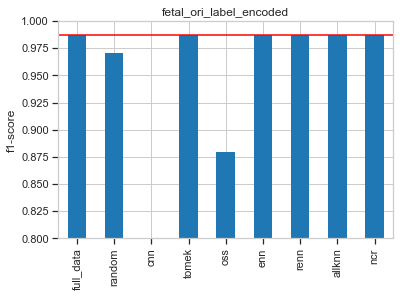

In [157]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('f1-score')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

##### Random Forest with undersampling techniques

In [158]:
# Random Forest

results_dict = {}
shapes_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    print(dataset)
    print("Imbalance Data")
    
    # as many undersampling techniques use KNN
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train_ori_label)
    X_train_ori_label = scaler.transform(X_train_ori_label)
    X_test_ori_label = scaler.transform(X_test_ori_label)
        
    metric_full = run_randomForests(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label)
    
    # store results
    results_dict[dataset]['full_data'] = metric_full
    shapes_dict[dataset]['full_data'] = len(X_train_ori_label)
    
    print()
    
    for undersampler in undersampler_dict.keys():
        
        print(undersampler)
        
        # resample
        X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train_ori_label, y_train_ori_label)
        
        # evaluate performance
        metric_under = run_randomForests(X_resampled, X_test_ori_label, y_resampled, y_test_ori_label)
        
        #store results
        results_dict[dataset][undersampler] = metric_under
        shapes_dict[dataset][undersampler] = len(X_resampled)
        print()
        
    print()

fetal_ori_label_encoded
Imbalance Data
Test set: Random Forest
Roc-auc Random Forests roc-auc: 0.9948668810669904
Accuracy Random Forest test: 0.9764890282131662

Precision Random Forest test: 0.9764239383333406

Recall Random Forest test: 0.9764890282131662

F-measure Random Forest test: 0.9757769068520387

Summary Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       497
           2       0.97      0.85      0.90        84
           3       0.98      0.98      0.98        57

    accuracy                           0.98       638
   macro avg       0.98      0.94      0.96       638
weighted avg       0.98      0.98      0.98       638


Confusion Matrix
[[496   1   0]
 [ 12  71   1]
 [  0   1  56]]

random
Test set: Random Forest
Roc-auc Random Forests roc-auc: 0.994095142764
Accuracy Random Forest test: 0.9858934169278997

Precision Random Forest test: 0.9859492993255394

Recall Random Forest test: 0.9858934169278997

F-me

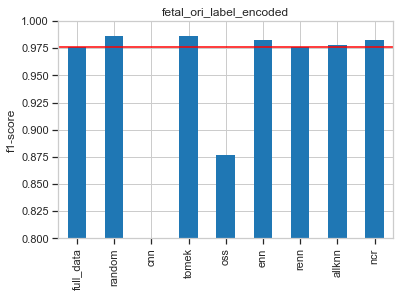

In [159]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('f1-score')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

**[Back to Undersampling techniques](#Undersampling-techniques)**

#### Oversampling techniques
* [Decision Tree with oversampling techniques](#Decision-Tree-with-oversampling-techniques)
* [Random Forest with oversampling techniques](#Random-Forest-with-oversampling-techniques)

**[Back to Content](#Contents)**

In [160]:
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE
)

In [161]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=123),

    'smote': SMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=123,  # for reproducibility
        k_neighbors=5,
        n_jobs=-1),

#     'adasyn': ADASYN(
#         sampling_strategy='auto',  # samples only the minority class
#         random_state=123,  # for reproducibility
#         n_neighbors=5,
#         n_jobs=-1),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=123,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=-1),

    'border2': BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=123,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-2',
        n_jobs=-1)
}

##### Decision Tree with oversampling techniques

In [162]:
# to save the results
results_dict = {}
shapes_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    # as some oversampling techniques use KNN
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train_ori_label)
    X_train_ori_label = scaler.transform(X_train_ori_label)
    X_test_ori_label = scaler.transform(X_test_ori_label)
        
    metric = run_decision_tree(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label)
    
    # store results
    results_dict[dataset]['full_data'] = metric
    shapes_dict[dataset]['full_data'] = len(X_train_ori_label)
    
    print()
    
    for oversampler in oversampler_dict.keys():
        
        print(oversampler)
        
        # resample
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train_ori_label, y_train_ori_label)
        
        # evaluate performance
        metric = run_decision_tree(X_resampled, X_test_ori_label, y_resampled, y_test_ori_label)
        
        #store results
        results_dict[dataset][oversampler] = metric
        shapes_dict[dataset][oversampler] = len(X_resampled)
        print()
        
    print()

Test set: Decision Tree
Roc-auc Decision Tree roc-auc: 0.9776374268655328
Accuracy Decision Tree test: 0.987460815047022

Precision Decision Tree test: 0.9873666460183081

Recall Decision Tree test: 0.987460815047022

F-measure Decision Tree test: 0.9873267446277217

Summary Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       497
           2       0.97      0.93      0.95        84
           3       0.98      0.98      0.98        57

    accuracy                           0.99       638
   macro avg       0.98      0.97      0.98       638
weighted avg       0.99      0.99      0.99       638


Confusion Matrix
[[496   1   0]
 [  5  78   1]
 [  0   1  56]]

random
Test set: Decision Tree
Roc-auc Decision Tree roc-auc: 0.9776374268655328
Accuracy Decision Tree test: 0.987460815047022

Precision Decision Tree test: 0.9873666460183081

Recall Decision Tree test: 0.987460815047022

F-measure Decision Tree test: 0.9873267446277

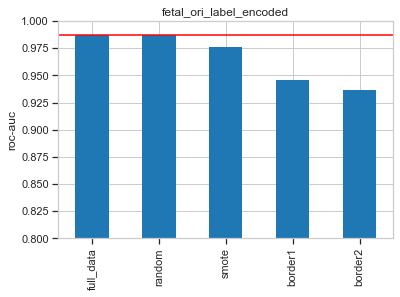

In [163]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

**[Back to Oversampling techniques](#Oversampling-techniques)**

##### Random Forest with oversampling techniques

In [164]:
# to save the results
results_dict = {}
shapes_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    # as some oversampling techniques use KNN
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train_ori_label)
    X_train_ori_label = scaler.transform(X_train_ori_label)
    X_test_ori_label = scaler.transform(X_test_ori_label)
        
    metric = run_randomForests(X_train_ori_label, X_test_ori_label, y_train_ori_label, y_test_ori_label)
    
    # store results
    results_dict[dataset]['full_data'] = metric
    shapes_dict[dataset]['full_data'] = len(X_train_ori_label)
    
    print()
    
    for oversampler in oversampler_dict.keys():
        
        print(oversampler)
        
        # resample
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train_ori_label, y_train_ori_label)
        
        # evaluate performance
        metric = run_randomForests(X_resampled, X_test_ori_label, y_resampled, y_test_ori_label)
        
        #store results
        results_dict[dataset][oversampler] = metric
        shapes_dict[dataset][oversampler] = len(X_resampled)
        print()
        
    print()

Test set: Random Forest
Roc-auc Random Forests roc-auc: 0.9948668810669904
Accuracy Random Forest test: 0.9764890282131662

Precision Random Forest test: 0.9764239383333406

Recall Random Forest test: 0.9764890282131662

F-measure Random Forest test: 0.9757769068520387

Summary Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       497
           2       0.97      0.85      0.90        84
           3       0.98      0.98      0.98        57

    accuracy                           0.98       638
   macro avg       0.98      0.94      0.96       638
weighted avg       0.98      0.98      0.98       638


Confusion Matrix
[[496   1   0]
 [ 12  71   1]
 [  0   1  56]]

random
Test set: Random Forest
Roc-auc Random Forests roc-auc: 0.991266029319909
Accuracy Random Forest test: 0.9843260188087775

Precision Random Forest test: 0.9842045127030573

Recall Random Forest test: 0.9843260188087775

F-measure Random Forest test: 0.98424418

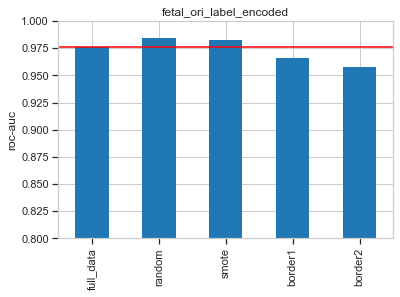

In [165]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

**[Back to Oversampling techniques](#Oversampling-techniques)**